# Clustering and PCA on Heart Failure Clinical Records

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt

In [2]:
# Load the new dataset
data = pd.read_csv('../data/external/heart_failure_clinical_records_dataset.csv', low_memory=False)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Selecting features for clustering
features = data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                 'serum_creatinine', 'serum_sodium', 'time']]
features

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [4]:
# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

In [5]:
# Dictionary to store scaled outputs
scaler_outputs = {}
for name, scaler in scalers.items():
    # Scaling features
    scaled_features = scaler.fit_transform(features)
    scaler_outputs[name] = scaled_features
    
    # Display the scaled features
    print(f"Scaled Features with {name}:")
    display(pd.DataFrame(scaled_features[:5], columns=features.columns))
    
    # Apply PCA
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)
    
    # Clustering methods
    clustering_algorithms = {
        'KMeans': KMeans(n_clusters=3),
        'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
    }

Scaled Features with StandardScaler:


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


Scaled Features with MinMaxScaler:


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


Scaled Features with Normalizer:


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.000283,0.002196,0.000075,0.999997,0.000007,0.000491,0.000015
1,0.000209,0.029836,0.000144,0.999555,0.000004,0.000516,0.000023
2,0.000401,0.000901,0.000123,0.999999,0.000008,0.000796,0.000043
3,0.000238,0.000529,0.000095,1.000000,0.000009,0.000652,0.000033
4,0.000199,0.000489,0.000061,1.000000,0.000008,0.000355,0.000024


Clustering Algorithm: KMeans with Scaler: Normalizer


,Normalizer - KMeans Cluster Labels
0,1
1,2
2,1
3,1
4,1


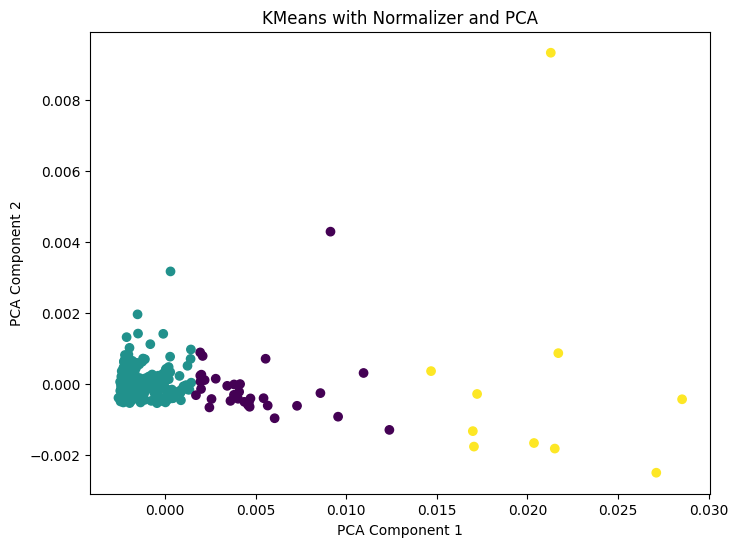

Clustering Algorithm: AgglomerativeClustering with Scaler: Normalizer


,Normalizer - AgglomerativeClustering Cluster Labels
0,0
1,1
2,0
3,0
4,0


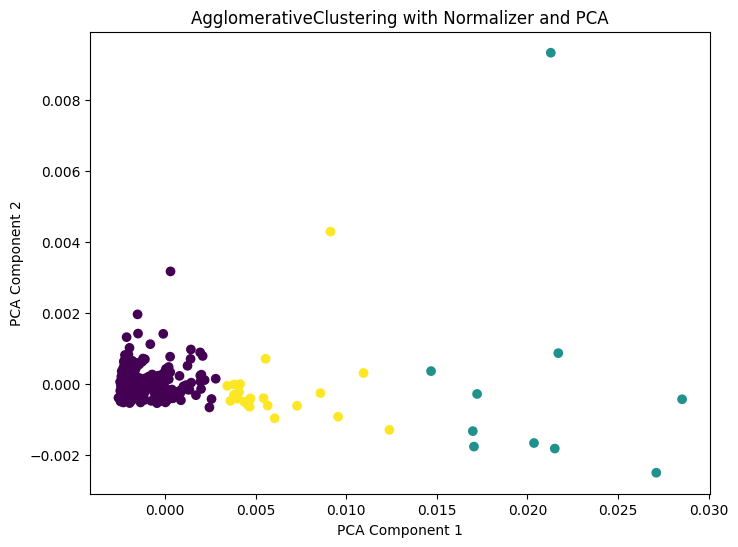

Clustering Algorithm: DBSCAN with Scaler: Normalizer


,Normalizer - DBSCAN Cluster Labels
0,0
1,0
2,0
3,0
4,0


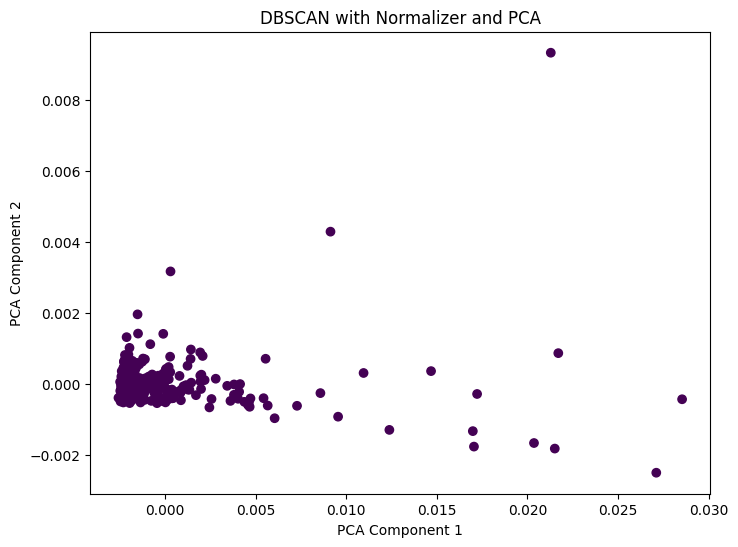

In [6]:
for algo_name, algorithm in clustering_algorithms.items():
        # Fit the clustering algorithm
        labels = algorithm.fit_predict(pca_features)
        
        # Display the classifier name and output labels
        print(f"Clustering Algorithm: {algo_name} with Scaler: {name}")
        display(pd.DataFrame(labels, columns=[f'{name} - {algo_name} Cluster Labels']).head())
        
        # Plot the results
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis', marker='o')
        plt.title(f"{algo_name} with {name} and PCA")
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()